# Problem set 3

[your name] Waleed Rajabally

[working title of the project] Gentrification in San Jose

[date] 3/11/20

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)
    
    The DV (powerty) will change negatively as the IV (ownershp) changes positively.  The poverty variable is a measure on the ACS that represents the percentage that an individual is impoverished. The ownership variable shows which residents are renting and which own or are in the process of buying the homes they live in. 

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.
    
    I believe that a logarithmic model will most adequately reflect the relationship between poverty and ownership because it of the steepness in the curve reflected in logarithmic models.  I've also noticed that a lot of gentrification studies use log models.  I don't think a quadratic or splines model will adequately reflect the data because I don't think the relaitonship between the dependent and independent variable varies, but rather rises consistently and steeply in one direction.

    C. State your explanation why (theory) you make the predictions in A. and B.
    I believe that there is an association between poverty and homeownership, so that we will see greater poverty associated with homeownership.  Homeowners will be moving into more impoverished areas because the property is affordable and cheap.  This is specific to the area of East San Jose that is surrounded by neighborhoods with significantly higher property values.

    D. Tell us the source of your data and describe its sample.
    The data source is from the American Community Survey and I'm sampling from Puma's 8505 and 8514.

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [1]:
clear
use "/Users/waleed/Documents/Waleed-Soc211/MoveinVariable_SanJose2_datafile.dta"
qui keep if puma == 8505 | puma == 8514
qui tab puma
qui sort year
qui order year puma poverty 
qui des poverty
qui sum poverty, d  
qui tab poverty
qui sum ownershp, det
qui sum ownershpd, det
qui tab ownershp
qui tab ownershpd
qui sum poverty, d
qui gen highpov= .
qui replace highpov = 1 if poverty >= 100
qui tab highpov poverty in 1/15
qui order year puma poverty highpov
qui replace highpov = 1 if year ==2012
qui replace highpov = 2 if year ==2018
qui tab highpov
qui label define highpov 1 "2012" 2 "2018"
qui label value highpov highpov
qui tab ownershp
qui sum ownershp
qui codebook ownershp
qui gen homeowners2012= .
qui replace homeowners2012=1 if ownershp == 2 & year == 2012
qui gen homeowners2018= .
qui replace homeowners2018=1 if ownershp == 2 & year == 2018
qui gen move2012=movedin
qui replace move2012=1 if year ==2012
qui replace move2012= . if year !=2012
qui gen move2018=movedin
qui replace move2018=1 if year == 2018
qui replace move2018= . if year !=2018
qui order year move2012 move2018 homeowners2012 homeowners2018


In [7]:
xi i.ownershp, noomit

In [8]:
%head ownershp _I* if _n<6

,ownershp,_Iownershp_0,_Iownershp_1,_Iownershp_2
1,rented,0,0,1
2,rented,0,0,1
3,rented,0,0,1
4,owned or being bought (loan),0,1,0
5,owned or being bought (loan),0,1,0


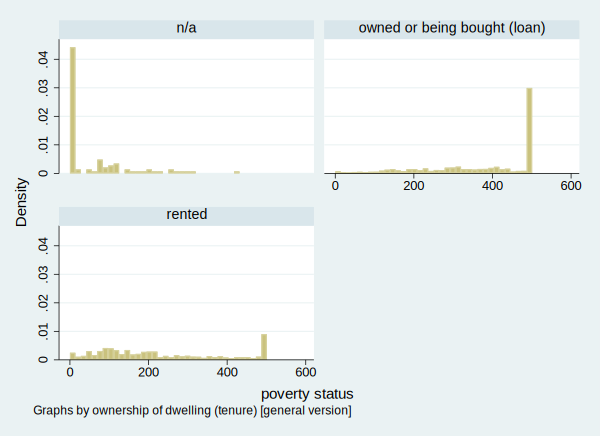

In [18]:
histogram poverty, by(ownershp)

In [11]:
xi: reg poverty ib1.ownershp
xi: reg poverty ib2.ownershp 




      Source |       SS           df       MS      Number of obs   =     4,976
-------------+----------------------------------   F(2, 4973)      =    692.20
       Model |  29599905.6         2  14799952.8   Prob > F        =    0.0000
    Residual |   106328048     4,973  21381.0673   R-squared       =    0.2178
-------------+----------------------------------   Adj R-squared   =    0.2174
       Total |   135927953     4,975  27322.2017   Root MSE        =    146.22

------------------------------------------------------------------------------
     poverty |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    ownershp |
        n/a  |  -316.3755    14.5669   -21.72   0.000    -344.9331    -287.818
     rented  |  -143.1579   4.435805   -32.27   0.000    -151.8541   -134.4618
             |
       _cons |   372.2698   2.570458   144.83   0.000     367.2305     377.309
-------------------

In [19]:
qui est clear

*Model 1 - no quadritic
qui eststo: regress poverty ownershp

*Model 2 - quadratic added
gen ownershp2=ownershp^2
qui eststo: regress poverty ownershp ownershp2

In [20]:
**Print a table with the two models
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase


--------------------------------------------
                      (1)             (2)   
                  poverty         poverty   
                     b/se            b/se   
--------------------------------------------
ownershp          -93.876***      546.142***
                  (4.447)        (22.187)   
ownershp2                        -229.767***
                                  (7.828)   
_cons             441.369***       55.894***
                  (6.234)        (14.338)   
--------------------------------------------
R-Sqaured           0.082           0.218   
N                4976.000        4976.000   
--------------------------------------------


In [21]:
**Create a logged income variable
gen poverty_ln=log(poverty)
*drop yhat yhatln
qui est clear

**Regress w/o logging
qui eststo: reg poverty ownershp

** Predict Y-hat based on the above regression
qui predict yhat, xb


(45 missing values generated)





In [22]:
**Regress logged Y on education
qui eststo: reg poverty_ln ownershp

** Predict logged Y-hat based on the above regression
predict yhatln



(option xb assumed; fitted values)


In [23]:
**Then exponentiate 
replace yhatln=2.718^(yhatln)

**Print estimates from both models
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase


(4,976 real changes made)


--------------------------------------------
                      (1)             (2)   
                  poverty      poverty_ln   
                     b/se            b/se   
--------------------------------------------
ownershp          -93.876***       -0.484***
                  (4.447)         (0.030)   
_cons             441.369***        6.132***
                  (6.234)         (0.042)   
--------------------------------------------
R-Sqaured           0.082           0.051   
N                4976.000        4931.000   
--------------------------------------------


## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    I realize now that I confused the measurement of the poverty variable, I misread the description and thought that the numbers correlated to the degree of poverty, when in fact the numbers represented the percentage a person was above the poverty line.  So a number of 500 means that the respondent is 500 times over the poverty line.  Initially I thought that East San Jose, which has a higher rate of poverty will  show higher rates of homeownership.  Instead what I saw in the dummy variable regression and the graph is that that poverty is decreasing as homeownership is increasing, which makes perfect sense.  The problem is that the DV and IV are too interconnected for me to make a proper distinction.  I realize that I should have included more information in order to assess a proper connection.  I actually had another relationship I wanted to test, but had problems categorizing it and had to opt for the poverty ownershop relationship. 
    
    The nonlinear models showed was that as poverty decreases (which would be displayed as increasing) homeownership is decreasing.  It is hard to draw conclusions from the results because I couldn't figure out how to separate the categories of rent and homeownership (both under the ownershp variable) when doing the non-linear regressions.  So it is measuring both rental rates and ownership rates and I therefore can't draw any conclusions from the results.  
    
    
    B. Say whether a linear or particular non-linear model best describes your data and why
    
For the limitations mentioned above the linear dummy model best described the data.  However the shape of the histogram between poverty and homeownership has a really sharp and distinctive skew which matches the shape of a log relationship.  